# Linear Regression with Scikit Learn - Machine Learning with Python¶

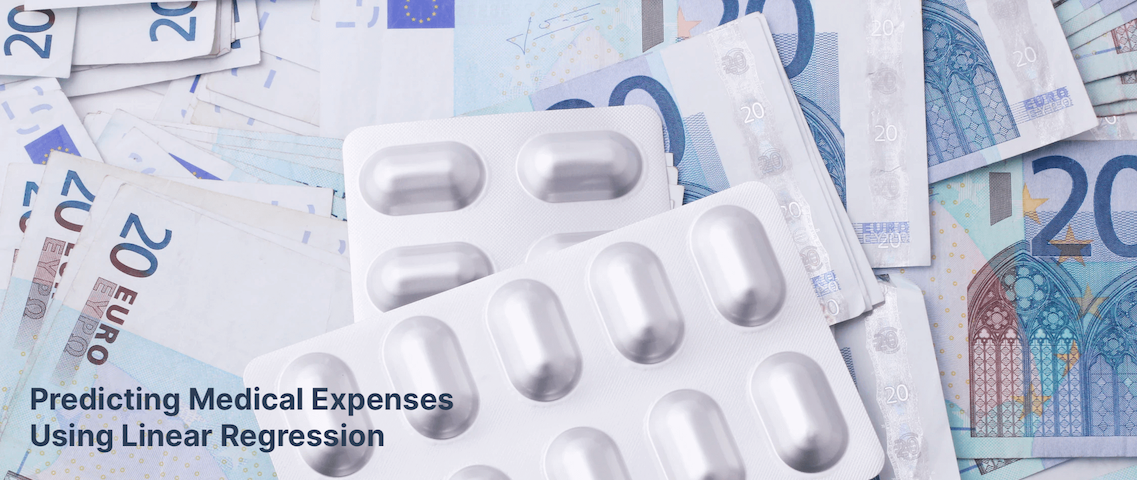

1. Install the Jovian python library (one-time):
    pip install jovian --upgrade
2. Download the notebook and associated files:
    python -m jovian clone aakashns/python-sklearn-linear-regression 
    cd python-sklearn-linear-regression
3. Create a virtual environment using conda:
    conda create -n python-sklearn-linear-regression jupyter
4. Activate the environment and start the Jupyter notebook:
    conda activate python-sklearn-linear-regression
    jupyter notebook


# Problem Statement

QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets
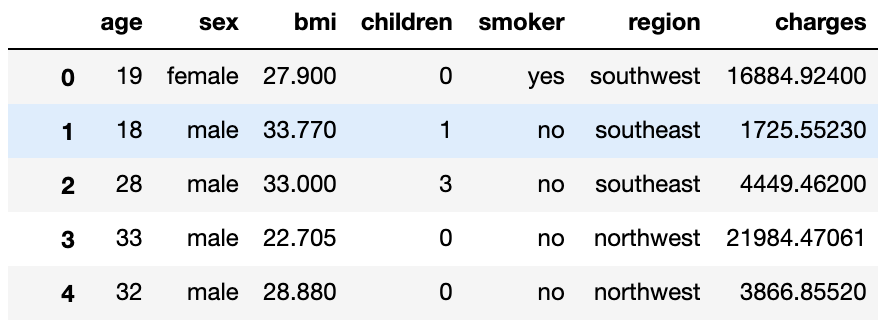


EXERCISE: Before proceeding further, take a moment to think about how can approach this problem. List five or more ideas that come to your mind below:

    1.Using information about the City
    2.Merital_status

# Downloading the Data

To begin, let's download the data using the urlretrieve function from urllib.request.

In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x20ea4ec5b80>)

We can now create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [4]:
import pandas as pd

In [5]:
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

Let's check the data type for each column.


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" (body mass index) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:


In [8]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.


> **EXERCISE**: What other inferences can you draw by looking at the table above? Add your inferences below:
>
> 1. medical_df.head(10)
> 2. medical_df.tail(5)
> 3. datatype for each column: medical_df.dtypes
> 4. medical_df.index
> 5. medical_df.columns



In [9]:
medical_df.head(10)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

In [10]:
medical_df.tail(5)

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [11]:
medical_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
medical_df.index

RangeIndex(start=0, stop=1338, step=1)

In [13]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization. Follow these tutorials to learn how to use these libraries:

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet



In [14]:
!pip install plotly matplotlib seaborn 

In [15]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

The following setting will improve the default style and font size for our charts.

In [16]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins(one for each year)and a box plot. We'll use plotly to make the chart imteractive, but you can create similar charts using seaborn.

In [17]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [18]:
fig = px.histogram(medical_df,
                  x = 'age',
                  marginal = 'box',
                  nbins = 47,
                  title = 'Distribution of Age')
fig.update_layout(bargap = 0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the [number of people of any given age](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (between 18 & 64) in the USA.



> **EXERCISE**: Can you explain why there are over twice as many customers with ages 18 and 19, compared to other ages?
>
> May be ACME insurance is offering lower insureance premium to sign up before the age of 20.
>
> In my opinion 18 is the legal age for able to get the insurance, so thats why there are many customers with ages 18 and 19, compared to other ages.


# Body Mass Index

Lets look at the distribution of BMI(Body Mass index) of customers, using boxplot and histogram.

In [19]:
fig = px.histogram(medical_df,
                  x = 'bmi',
                  marginal = 'box',
                  color_discrete_sequence = ['red'],
                  title = 'Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap = 0.1)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

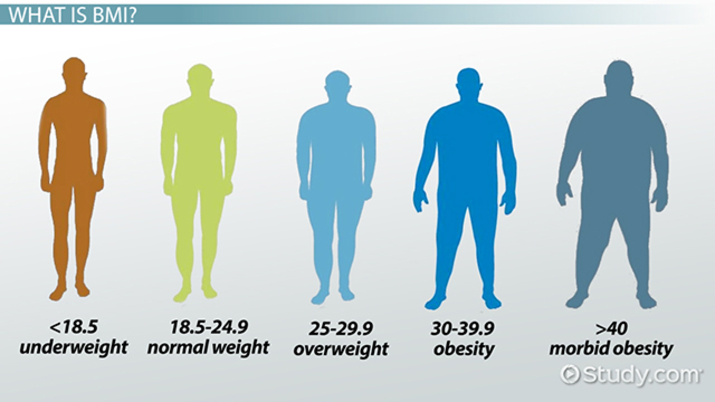![](https://i.imgur.com/lh23OiY.jpg)

> **EXERCISE**: Can you explain why the distribution of ages forms a uniform distribution while the distribution of BMIs forms a gaussian distribution?
>
> The distribuiton of ages form a uniform distribution because the probability of the x is constant.all points in range are equally likely to occur consequently it looks like a ractangle whereas the distribution of BMI forms a gaussian distribution where the probability of x is highest at the centre and lowest in the ends. 

# Charges

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict.lets also use the categorical column 'smoker' to distinguish the charges for smokers and non-smokers.

In [20]:
fig = px.histogram(medical_df,
                  x = 'charges',
                  marginal = 'box',
                  color = 'smoker',
                  color_discrete_sequence = ['green', 'grey'],
                  title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

We can make the following observations from the the above graph:
- for most of the customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher    medical expenses, Possibly due to accidents, major illness and genetic diseases. The distribution follows a 'power law'

- There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is close to 35,000. 

__EXERCISE__: Visualize the distribution of medical charges in connection with other factors like "sex" and "region". What do you observe?

Let's visualize the distribution of "charges" i.e. the Distribution of medical charges for customers. This is the column we're trying to predict.lets also use the categorical column 'sex' to distinguish the charges for male and female.

In [24]:
fig = px.histogram(medical_df,
                  x = 'charges',
                  marginal = 'box',
                  color = 'sex',
                  color_discrete_sequence = ['red', 'blue'],
                  title = 'Distribution Of Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

Visualization of 'Regionwise medical charges' by using the distribution of charges.The categorical column 'region' to distinguish the charges for Southwest, southeast, northwest and northeast.

In [32]:
fig = px.histogram(medical_df,
                  x = 'charges',
                  marginal = 'box',
                  color = 'region',
                  color_discrete_sequence = ['green','red','grey','blue'],
                  title = 'region medical charges')
fig.update_layout(bargap = 0.1)
fig.show()

# Smoker

Let's visualize the distribution of the "smoker" column (containing values yes" and "no" ) using a histogram.

In [33]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [34]:
px.histogram(medical_df, x = 'smoker', color = 'sex', title = 'Smoker')

It appears that 20% of the customers have reproted that they smoke. Can yo verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males.

__Excersice__: Visualize the distribution of the "sex", "region" and "children" columns and report your observations.

In [36]:
medical_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [40]:
px.histogram(medical_df, x = "sex", color = "smoker", title = "Sex")

In [41]:
medical_df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [43]:
px.histogram(medical_df, x = "region", color = "smoker",title = "region")

In [44]:
medical_df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [46]:
px.histogram(medical_df, x = "children", color = "sex", title = "children")

# age and Charges

Let's visualize the relationship between age and charges using a scatter plot.each point in the scatter plot represents one customer.we'll also use values in the 'smoker' column to color the point.

In [49]:
fig = px.scatter(medical_df,
                x = 'age',
                y = 'charges',
                color = 'smoker',
                 opacity = 0.8,
                hover_data = ['sex'],
                title = 'Age vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

We can make the following observation from the above chart.


- The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

- We can see three "cluster" of points.each of which seems to form a line with an increasing slope:

    1. The first and the largest cluster consist primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others.
    2. The second cluster contains a mix of smokers and non-smokers. It's possible that therse are two distinct but overlapping clusters: " non-smoker with medical issues" and "smoker without major medical issues".
    3. The final cluster consist exclusively of smokers,presumabaly smokers with major medical issues that are possibly related to or worsened by smoking.

__EXERCISE__: What other infereces can you draw from the above charts?

# BMI and Charges

Let's visualize the relationship between BMI (Body mass index) and using another scatter plot. Once again,we'll use the values form the "smoker" column to color the points.

In [50]:
fig  = px.scatter(medical_df,
                 x = 'bmi',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 hover_data = ['sex'],
                 title = 'BMI vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()